<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Lab: Exploratory Data Analysis**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis or EDA. 


## Objectives


In this lab, you will perform the following:


- Examine the structure of a dataset.

- Handle missing values effectively.

- Conduct summary statistics on key columns.

- Analyze employment status, job satisfaction, programming language usage, and trends in remote work.


## Hands on Lab


#### Step 1: Install and Import Libraries


Install the necessary libraries for data manipulation and visualization.


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Step 2: Load and Preview the Dataset
Load the dataset from the provided URL. Use df.head() to display the first few rows to get an overview of the structure.


In [2]:
# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Set pandas option to display all columns
pd.set_option('display.max_columns', None)

# Display the first few rows of the dataset
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have never visited Stack Overflow or the Sta...,NaN,NaN,NaN,NaN,NaN,Yes,Very favorable,Increase productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,20,17,"Developer, full-stack",NaN,NaN,NaN,NaN,NaN,United Kingdom of Great Britain and Northern I...,NaN,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,Express;Htmx;Node.js;React;Remix,Express;Node.js;React,NaN,NaN,NaN,NaN,NaN,NaN,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,MacOS;Windows,MacOS,NaN,NaN,NaN,Microsoft Teams;Slack,Slack,Slack,NaN,NaN,NaN,Stack Overflow for Teams (private knowledge sh...,Multiple times per day,Yes,Multiple times per day,Quickly finding code solutions;Finding reliabl...,"Yes, definitely","No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Individual contributor,17.0,Agree,Disagree,Agree,Agree,Agree,Neither agree nor disa

#### Step 3: Handling Missing Data


Identify and manage missing values in critical columns such as `Employment`, `JobSat`, and `RemoteWork`. Implement a strategy to fill or drop these values, depending on the significance of the missing data.


In [3]:
## Write your code here
critical_columns = ['Employment', 'JobSat', 'RemoteWork'] 
missing_counts = df[critical_columns].isna().sum() 
print("Missing values:\n", missing_counts)

Missing values:
 Employment        0
JobSat        36311
RemoteWork    10631
dtype: int64


In [4]:
print(df['JobSat'].value_counts(dropna=False))
print("Most common JobSat value:", df['JobSat'].mode()[0]) 
df.dropna(subset=['JobSat'], inplace=True)
missing_jobsat = df['JobSat'].isna().sum()
print(f"Missing values in 'JobSat' after dropping NaN rows: {missing_jobsat}")

JobSat
NaN     36311
8.0      7509
7.0      6379
6.0      3751
9.0      3626
10.0     2251
5.0      1956
3.0      1165
4.0      1130
2.0       772
0.0       311
1.0       276
Name: count, dtype: int64
Most common JobSat value: 8.0
Missing values in 'JobSat' after dropping NaN rows: 0


In [5]:
missing_remotework = df['RemoteWork'].isna().sum()
print(f"Missing values in 'RemoteWork': {missing_remotework}")
print(df['RemoteWork'].value_counts(dropna=False))
print("Most common RemoteWork value:", df['RemoteWork'].mode()[0])

df.dropna(subset=['RemoteWork'], inplace=True)
missing_remote_work_after_drop = df['RemoteWork'].isna().sum()
print(f"Missing values in 'RemoteWork' after drop: {missing_remote_work_after_drop}")

Missing values in 'RemoteWork': 9
RemoteWork
Hybrid (some remote, some in-person)    12622
Remote                                  11103
In-person                                5392
NaN                                         9
Name: count, dtype: int64
Most common RemoteWork value: Hybrid (some remote, some in-person)
Missing values in 'RemoteWork' after drop: 0


#### Step 4: Analysis of Experience and Job Satisfaction


Analyze the relationship between years of professional coding experience (`YearsCodePro`) and job satisfaction (`JobSat`). Summarize `YearsCodePro` and calculate median satisfaction scores based on experience ranges.

- Create experience ranges for `YearsCodePro` (e.g., `0-5`, `5-10`, `10-20`, `>20` years).

- Calculate the median `JobSat` for each range.

- Visualize the relationship using a bar plot or similar visualization.


/tmp/ipykernel_549/1313029207.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_jobsat_by_experience = df.groupby('ExperienceRange')['JobSat'].median()


ExperienceRange
0-5 years      7.0
5-10 years     7.0
10-20 years    7.0
>20 years      8.0
Name: JobSat, dtype: float64


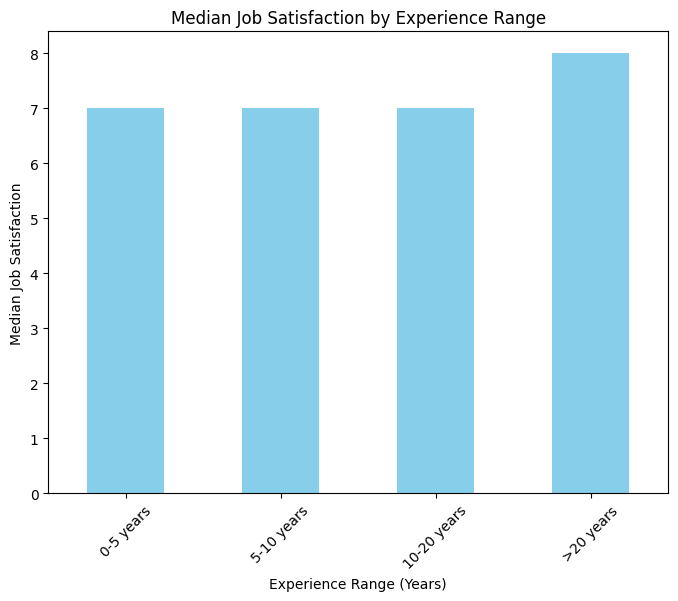

In [6]:
## Write your code here

# Create experience ranges for YearsCodePro (e.g., 0-5, 5-10, 10-20, >20 years).
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')
bins = [0, 5, 10, 20, float('inf')] 
labels = ['0-5 years', '5-10 years', '10-20 years', '>20 years'] 
df['ExperienceRange'] = pd.cut(df['YearsCodePro'].astype(float), bins=bins, labels=labels, right=False)

# Calculate the median JobSat for each range.
median_jobsat_by_experience = df.groupby('ExperienceRange')['JobSat'].median()
print(median_jobsat_by_experience)

# Visualize the relationship using a bar plot or similar visualization.
plt.figure(figsize=(8, 6))
median_jobsat_by_experience.plot(kind='bar', color='skyblue')
plt.title('Median Job Satisfaction by Experience Range')
plt.xlabel('Experience Range (Years)')
plt.ylabel('Median Job Satisfaction')
plt.xticks(rotation=45)
plt.show()

#### Step 5: Visualize Job Satisfaction


Use a count plot to show the distribution of `JobSat` values. This provides insights into the overall satisfaction levels of respondents.


/tmp/ipykernel_549/17289139.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='JobSat', data=df, palette='viridis')


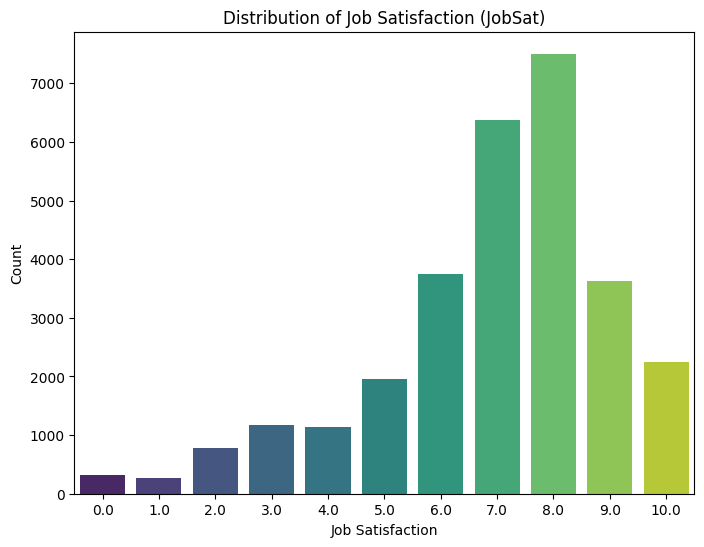

In [7]:
## Write your code here
plt.figure(figsize=(8, 6))
sns.countplot(x='JobSat', data=df, palette='viridis')
plt.title('Distribution of Job Satisfaction (JobSat)')
plt.xlabel('Job Satisfaction')
plt.ylabel('Count')
plt.show()

#### Step 6: Analyzing Remote Work Preferences by Job Role


Analyze trends in remote work based on job roles. Use the `RemoteWork` and `Employment` columns to explore preferences and examine if specific job roles prefer remote work more than others.

- Use a count plot to show remote work distribution.

- Cross-tabulate remote work preferences by employment type (e.g., full-time, part-time) and job roles.


/tmp/ipykernel_549/2077772465.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='RemoteWork', data=df, palette='viridis')


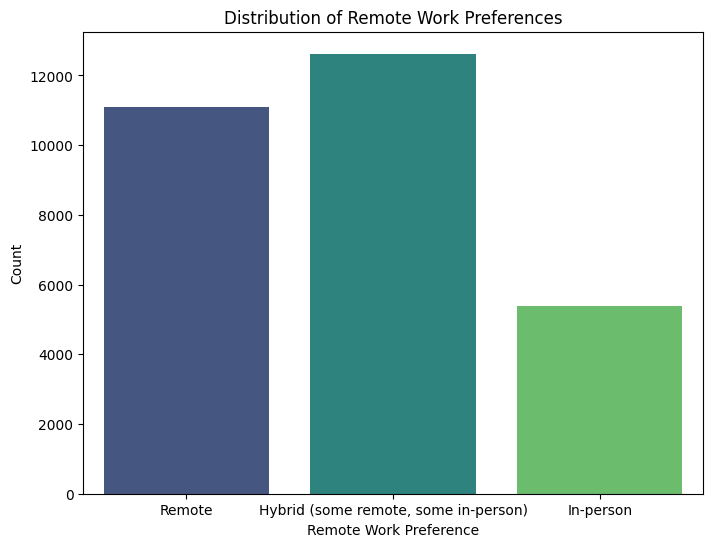

In [8]:
## Write your code here
plt.figure(figsize=(8, 6))
sns.countplot(x='RemoteWork', data=df, palette='viridis')
plt.title('Distribution of Remote Work Preferences')
plt.xlabel('Remote Work Preference')
plt.ylabel('Count')
plt.show()

#### Step 7: Analyzing Programming Language Trends by Region


Analyze the popularity of programming languages by region. Use the `LanguageHaveWorkedWith` column to investigate which languages are most used in different regions.

- Filter data by country or region.

- Visualize the top programming languages by region with a bar plot or heatmap.


In [9]:
## Write your code here

df_region = df[df['Country'] == 'United States of America']
languages_split = df_region['LanguageHaveWorkedWith'].dropna().str.split(';', expand=True).stack()
language_counts = languages_split.value_counts()
print(language_counts.head(10))

JavaScript                 3532
SQL                        3221
Python                     3097
HTML/CSS                   2936
Bash/Shell (all shells)    2553
TypeScript                 2359
C#                         1756
Java                       1420
C++                        1121
PowerShell                 1025
Name: count, dtype: int64


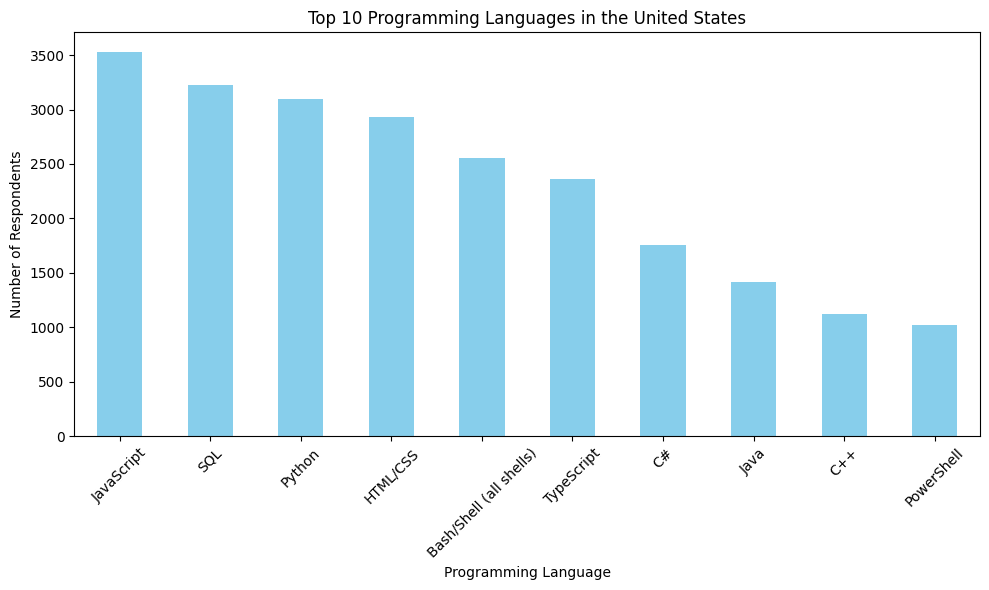

In [10]:
# bar chart
top_10_languages = language_counts.head(10)
plt.figure(figsize=(10, 6))
top_10_languages.plot(kind='bar', color='skyblue')
plt.title('Top 10 Programming Languages in the United States')
plt.xlabel('Programming Language')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

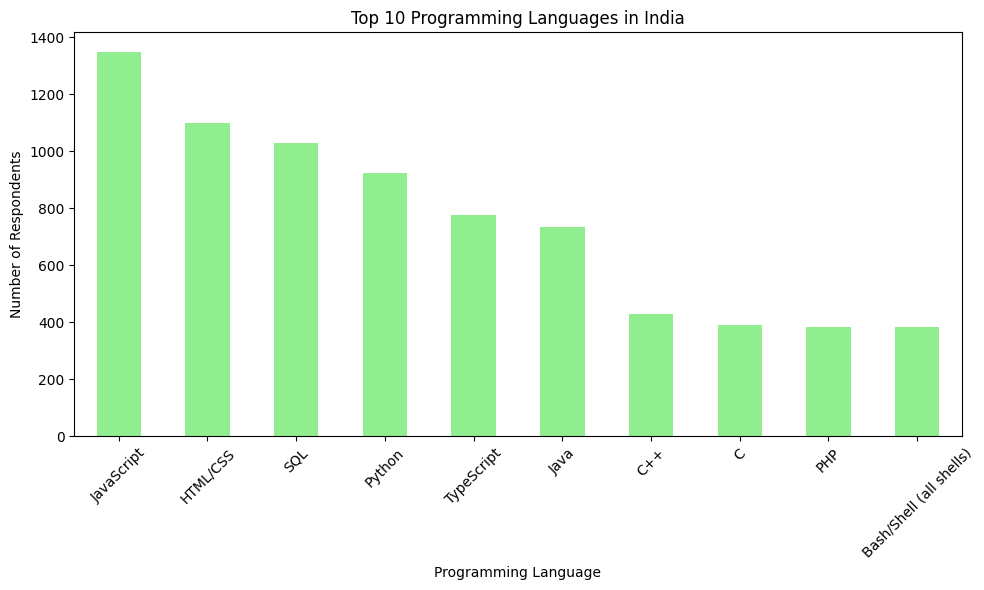

In [12]:
df_india = df[df['Country'] == 'India']
languages_split_india = df_india['LanguageHaveWorkedWith'].dropna().str.split(';', expand=True).stack()
language_counts_india = languages_split_india.value_counts()
top_10_india = language_counts_india.head(10)
plt.figure(figsize=(10, 6))
top_10_india.plot(kind='bar', color='lightgreen')
plt.title('Top 10 Programming Languages in India')
plt.xlabel('Programming Language')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

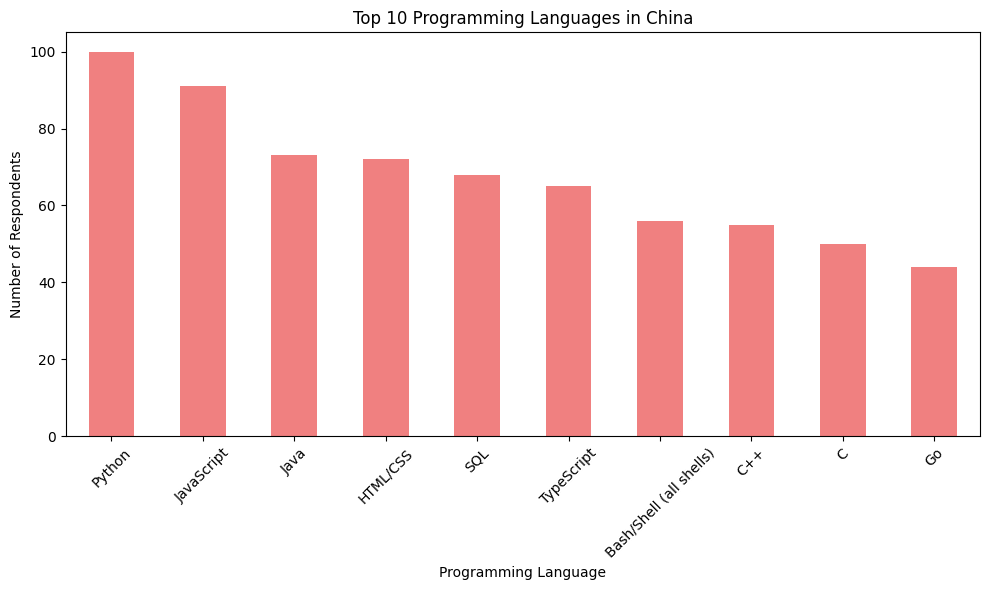

In [13]:
df_china = df[df['Country'] == 'China']
languages_split_china = df_china['LanguageHaveWorkedWith'].dropna().str.split(';', expand=True).stack()
language_counts_china = languages_split_china.value_counts()
top_10_china = language_counts_china.head(10)
plt.figure(figsize=(10, 6))
top_10_china.plot(kind='bar', color='lightcoral')
plt.title('Top 10 Programming Languages in China')
plt.xlabel('Programming Language')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Step 8: Correlation Between Experience and Satisfaction


Examine how years of experience (`YearsCodePro`) correlate with job satisfaction (`JobSatPoints_1`). Use a scatter plot to visualize this relationship.


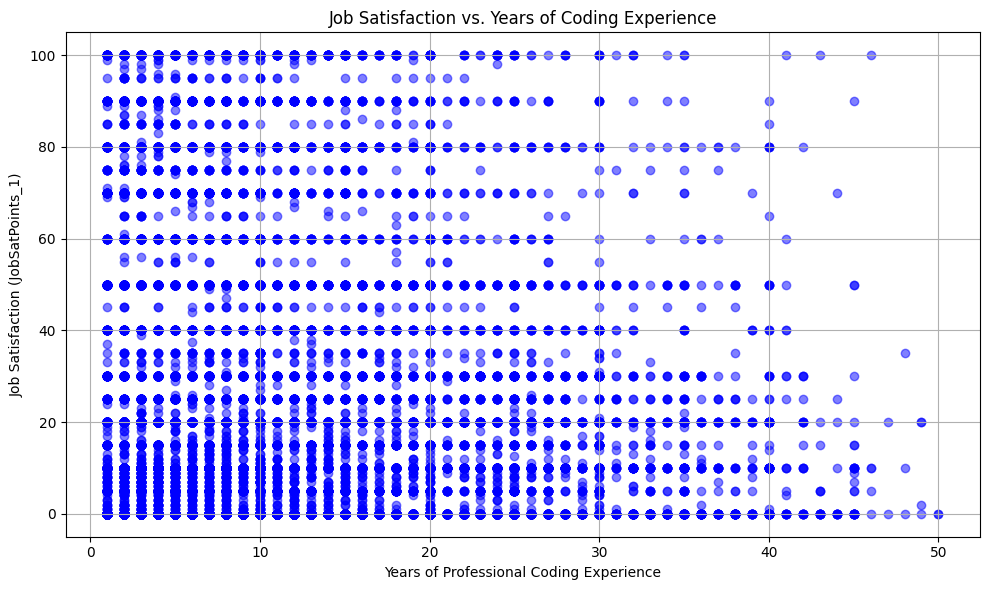

In [17]:
## Write your code here
df['YearsCodePro'] = df['YearsCodePro'].replace({
    'Less than 1 year': 0.5,
    'More than 50 years': 51
})
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')
scatter_df = df[['YearsCodePro', 'JobSatPoints_1']].dropna()
plt.figure(figsize=(10, 6))
plt.scatter(scatter_df['YearsCodePro'], scatter_df['JobSatPoints_1'], alpha=0.5, color='blue')
plt.title('Job Satisfaction vs. Years of Coding Experience')
plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Job Satisfaction (JobSatPoints_1)')
plt.grid(True)
plt.tight_layout()
plt.show()

#### Step 9: Educational Background and Employment Type


Explore how educational background (`EdLevel`) relates to employment type (`Employment`). Use cross-tabulation and visualizations to understand if higher education correlates with specific employment types.


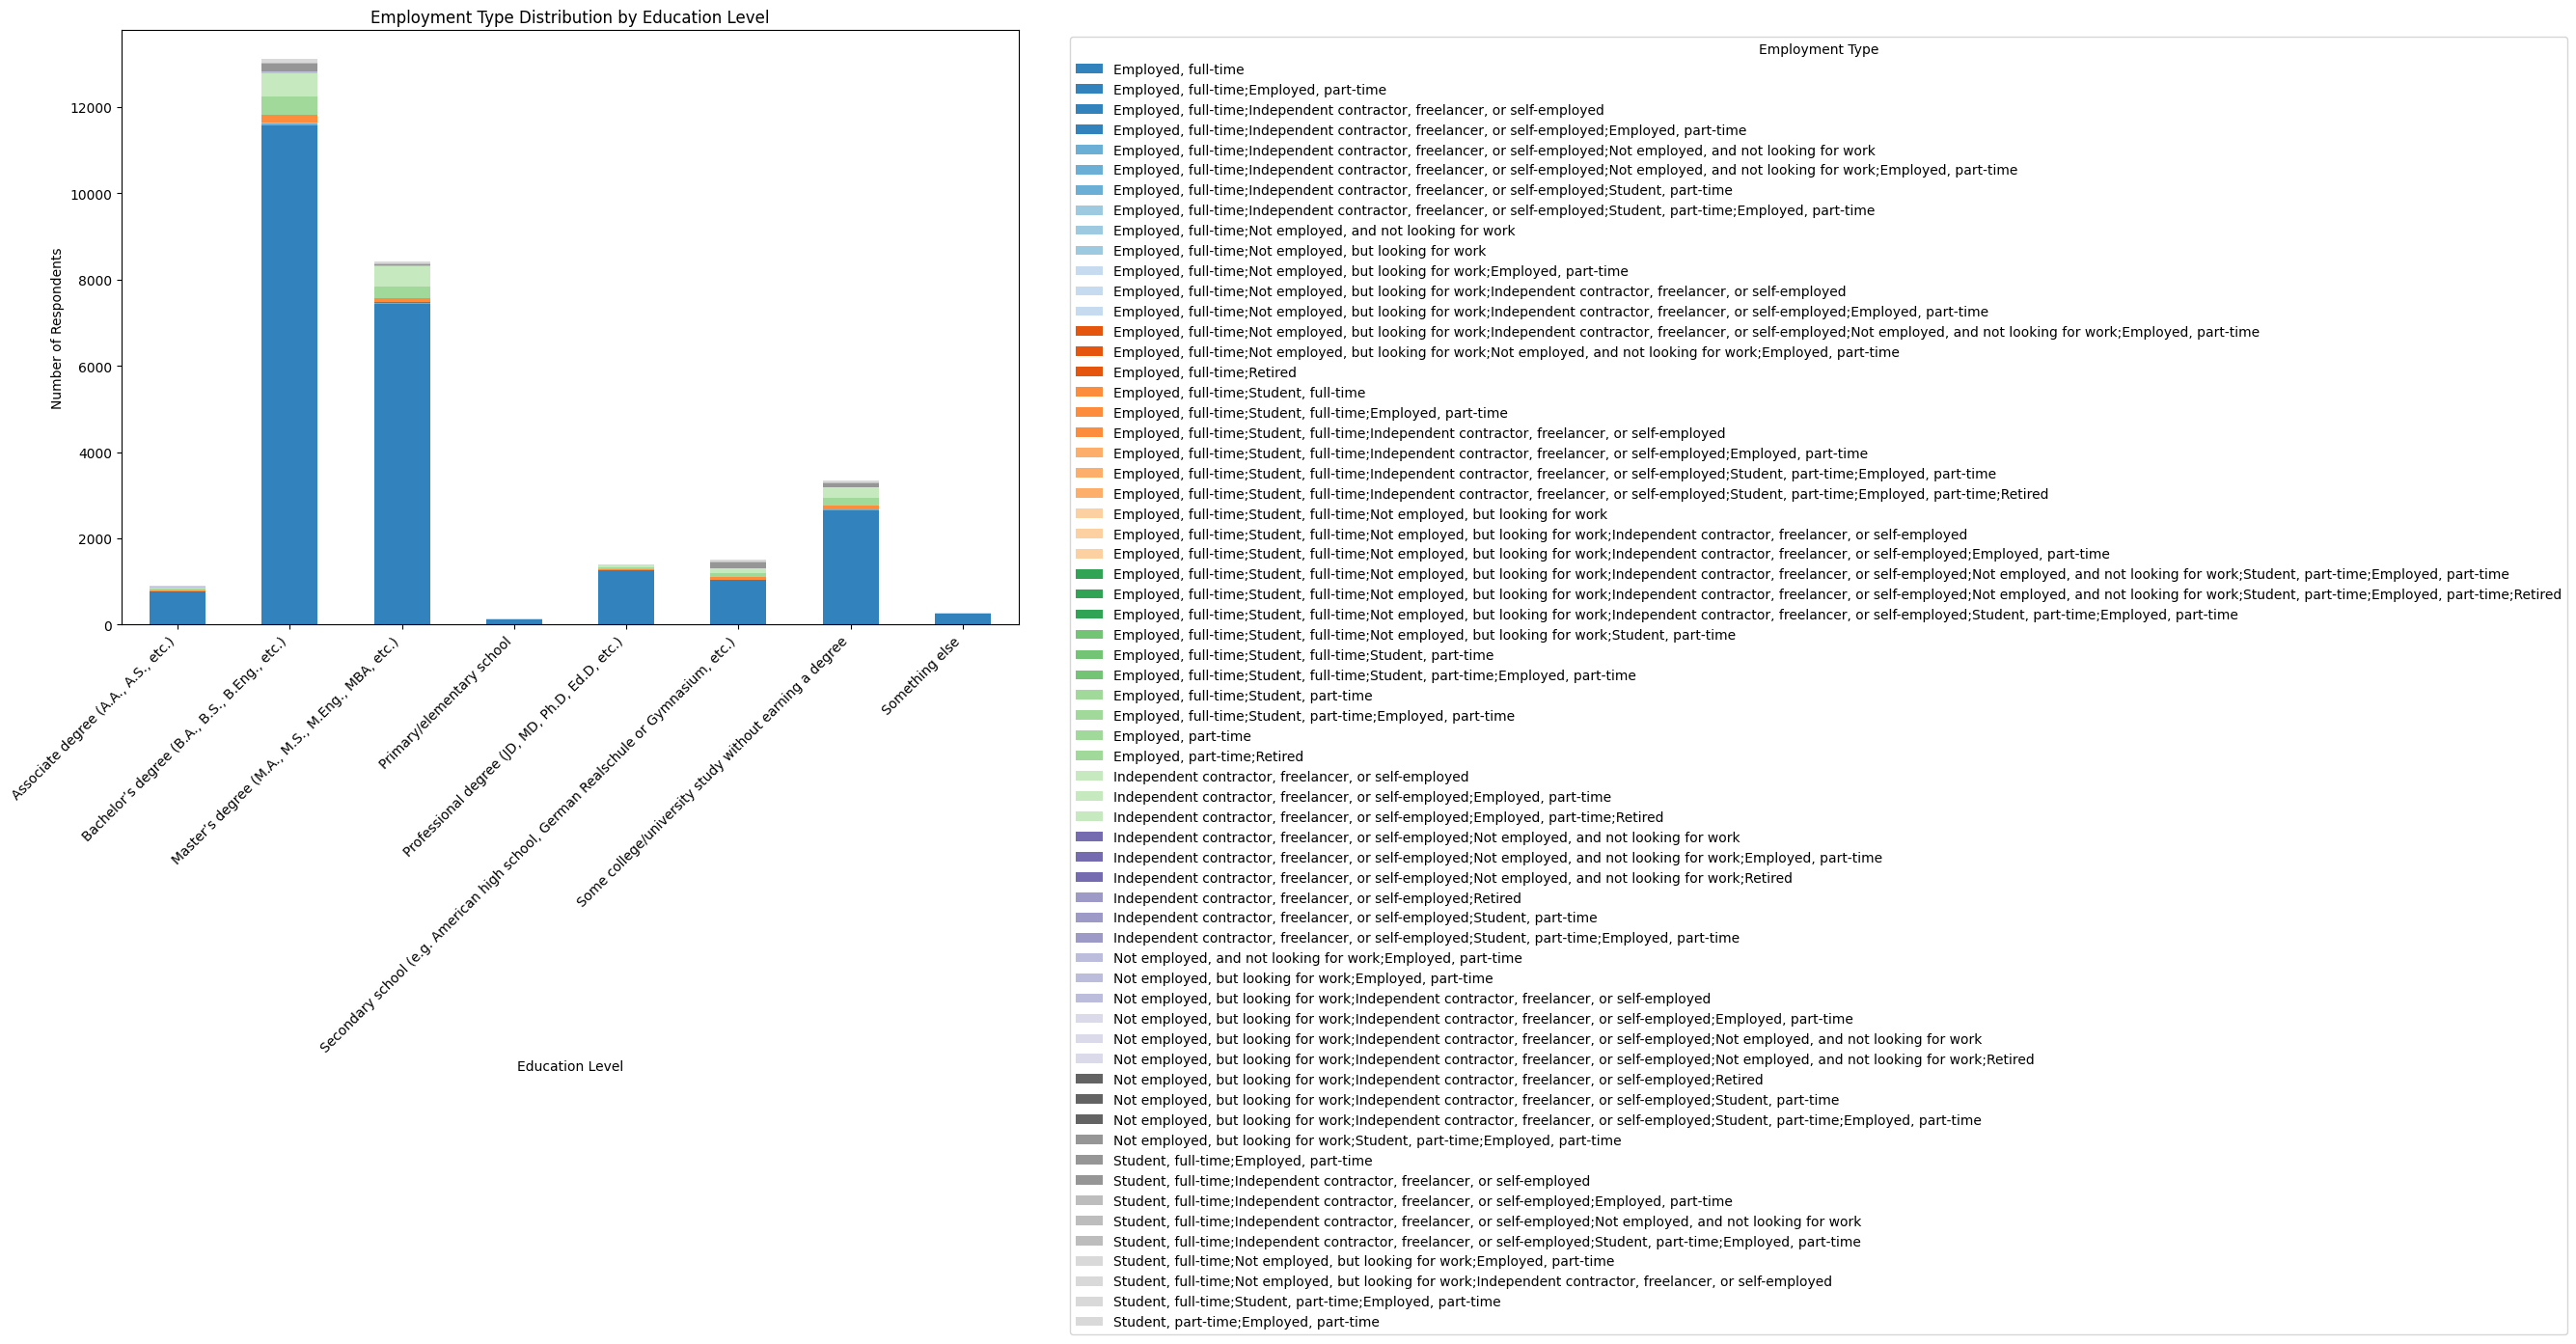

In [28]:
## Write your code here
df_clean = df[['EdLevel', 'Employment']].dropna()
# cross-tabulation
crosstab = pd.crosstab(df_clean['EdLevel'], df_clean['Employment'])
# stacked bar chart
crosstab.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='tab20c')
plt.title('Employment Type Distribution by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Employment Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

#### Step 10: Save the Cleaned and Analyzed Dataset


After your analysis, save the modified dataset for further use or sharing.


In [29]:
## Write your code here
df.to_csv('cleaned_analyzed_dataset.csv', index=False)
print("Dataset saved as 'cleaned_analyzed_dataset.csv'")

Dataset saved as 'cleaned_analyzed_dataset.csv'


<h2>Summary</h2>


In this revised lab, you:

- Loaded and explored the structure of the dataset.

- Handled missing data effectively.

- Analyzed key variables, including working hours, job satisfaction, and remote work trends.

- Investigated programming language usage by region and examined the relationship between experience and satisfaction.

- Used cross-tabulation to understand educational background and employment type.


Copyright © IBM Corporation. All rights reserved.
